In [3]:
from synergy.combination import MuSyC
from synergy.utils.dose_tools import grid

In [5]:
E0, E1, E2, E3 = 1, 0.7, 0.4, 0.
h1, h2 = 2.3, 0.8
C1, C2 = 1e-2, 1e-1
alpha12, alpha21 = 3.2, 1.1
gamma12, gamma21 = 2.5, 0.8

truemodel = MuSyC(E0=E0, E1=E1, E2=E2, E3=E3, h1=h1, h2=h2, C1=C1, C2=C2, alpha12=oalpha12, \
              alpha21=oalpha21, gamma12=gamma12, gamma21=gamma21)

In [6]:
print(truemodel)

MuSyC(E0=1.00, E1=0.70, E2=0.40, E3=0.00, h1=2.30, h2=0.80, C1=1.00e-02, C2=1.00e-01, alpha12=3.20, alpha21=1.10, beta=0.67, gamma12=2.50, gamma21=0.80)


In [7]:
print(truemodel.E(C1, C2))

0.43485173468873367


In [8]:
d1, d2 = grid(C1/1e2, C1*1e2, C2/1e2, C2*1e2, 8, 8)
print(d1.shape, d2.shape)

(64,) (64,)


In [9]:
E = truemodel.E(d1, d2)
print(E.shape)

(64,)


In [10]:
import numpy as np

E_noisy = E * (1+0.1*(2*np.random.rand(len(E))-1))
print(E_noisy.shape)

(64,)


In [11]:
model = MuSyC()
model.fit(d1, d2, E_noisy, bootstrap_iterations=100)
print(model)

MuSyC(E0=0.99, E1=0.69, E2=0.40, E3=0.00, h1=2.15, h2=0.81, C1=8.95e-03, C2=1.13e-01, alpha12=3.48, alpha21=0.99, beta=0.68, gamma12=2.64, gamma21=0.84)


In [12]:
print(model.get_parameter_range().T)

[[ 9.54508444e-01  1.02889420e+00]
 [ 6.54646673e-01  7.16017086e-01]
 [ 3.53199392e-01  4.40931340e-01]
 [-2.95512935e-02  2.45761452e-02]
 [ 1.63479915e+00  3.03712531e+02]
 [ 6.14416152e-01  1.10347737e+00]
 [ 6.50743725e-03  6.16034069e-01]
 [ 8.52139479e-02  1.68634243e-01]
 [ 2.53611455e+00  5.36699546e+00]
 [ 6.58915075e-01  6.49504405e+01]
 [ 1.72937276e+00  3.60822059e+00]
 [ 1.79304906e-01  1.03377093e+00]]


In [17]:
print(truemodel.summary())

beta	0.67	(>0) synergistic
alpha12	3.20	(>1) synergistic
alpha21	1.10	(>1) synergistic
gamma12	2.50	(>1) synergistic
gamma21	0.80	(<1) antagonistic


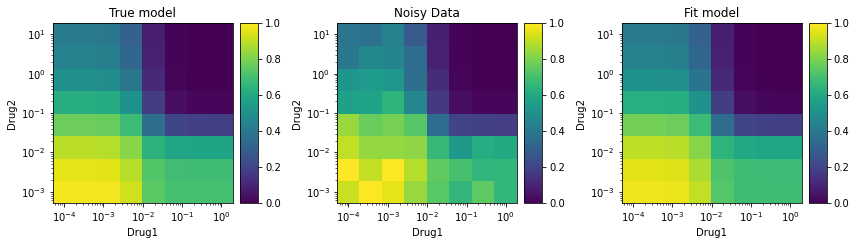

In [19]:
from matplotlib import pyplot as plt
from synergy.utils import plots

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(131)
truemodel.plot_heatmap(d1, d2, xlabel="Drug1", ylabel="Drug2", cmap="viridis",title="True model", ax=ax, vmin=0, vmax=1)

ax = fig.add_subplot(132)
plots.plot_heatmap(d1, d2, E_noisy, ax=ax, title="Noisy Data", cmap="viridis", xlabel="Drug1", ylabel="Drug2", vmin=0, vmax=1)

ax = fig.add_subplot(133)
model.plot_heatmap(d1, d2, xlabel="Drug1", ylabel="Drug2", cmap="viridis",title="Fit model", ax=ax, vmin=0, vmax=1)

plt.tight_layout()